# Dataset-3 Time Series

In [27]:
! pip install pmdarima --user

  Using cached pmdarima-1.8.4-cp38-cp38-win_amd64.whl (600 kB)
  Using cached statsmodels-0.13.0-cp38-none-win_amd64.whl (9.4 MB)
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [2]:
df = pd.read_csv(r'C:\Users\burq_\Downloads\DAAN 888-Design and Implementation of Analytics system\DAAN 888 Datasets\Final datasets\all cleaned-transformed datasets\Dataset-3-cleaned.csv', parse_dates=['Date'], index_col= 'Date')

list(df.columns)

['MMWR_week',
 'Recip_State',
 'Series_Complete_Pop_Pct',
 'Series_Complete_12PlusPop_Pct',
 'Series_Complete_18PlusPop_Pct',
 'Series_Complete_65PlusPop_Pct',
 'Completeness_pct',
 'Administered_Dose1_Pop_Pct',
 'Administered_Dose1_Recip_12PlusPop_Pct',
 'Administered_Dose1_Recip_18PlusPop_Pct',
 'Administered_Dose1_Recip_65PlusPop_Pct']

parse_date=['Date'] is to change the format of date to datetime and index_col = 'Date' is to amke the date column index

In [3]:
df.head(3)

,MMWR_week,Recip_State,Series_Complete_Pop_Pct,Series_Complete_12PlusPop_Pct,Series_Complete_18PlusPop_Pct,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct
Date,,,,,,,,,,,
2021-10-17,42,NC,55.7,67.2,69.9,87.3,96.4,64.9,78.3,81.1,99.9
2021-10-17,42,AL,52.8,61.5,63.3,85.3,92.5,62.9,73.4,75.1,94.6
2021-10-17,42,NE,32.9,38.0,39.8,46.7,89.7,0.0,0.0,0.0,0.0


In [4]:
df.tail(3)

,MMWR_week,Recip_State,Series_Complete_Pop_Pct,Series_Complete_12PlusPop_Pct,Series_Complete_18PlusPop_Pct,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct
Date,,,,,,,,,,,
2020-12-13,51,WV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-13,51,TX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-13,51,GA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Beginning date of dataset is 12/13/2020 and last date is 10/17/2021.

Lets plot one of the columns against time 

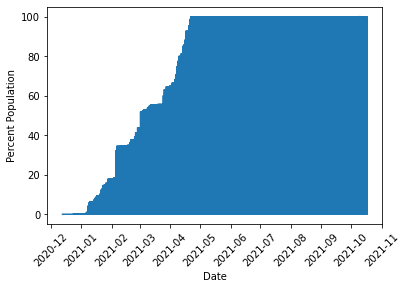

In [9]:
plt.xlabel('Date')
plt.ylabel('Percent Population')
plt.xticks(rotation=45)
plt.plot(df['Series_Complete_Pop_Pct'])

We can see here that nothing is clear from the plot above. The reason being that we have too many entries for the same date. Let's aggregate the data daily, weekly and monthly by taking their average, and remove the MMWR week and state columns as we don't need them.

In [5]:
df.drop(['MMWR_week', 'Recip_State'], axis=1, inplace=True)
df_daily = df.resample("D").mean()
df_weekly = df.resample("W").mean()
df_monthly = df.resample("M").mean()

In [6]:
df_daily.count()

Series_Complete_Pop_Pct                   309
Series_Complete_12PlusPop_Pct             309
Series_Complete_18PlusPop_Pct             309
Series_Complete_65PlusPop_Pct             309
Completeness_pct                          309
Administered_Dose1_Pop_Pct                309
Administered_Dose1_Recip_12PlusPop_Pct    309
Administered_Dose1_Recip_18PlusPop_Pct    309
Administered_Dose1_Recip_65PlusPop_Pct    309
dtype: int64

In [7]:
df_weekly.count()

Series_Complete_Pop_Pct                   45
Series_Complete_12PlusPop_Pct             45
Series_Complete_18PlusPop_Pct             45
Series_Complete_65PlusPop_Pct             45
Completeness_pct                          45
Administered_Dose1_Pop_Pct                45
Administered_Dose1_Recip_12PlusPop_Pct    45
Administered_Dose1_Recip_18PlusPop_Pct    45
Administered_Dose1_Recip_65PlusPop_Pct    45
dtype: int64

In [8]:
df_monthly.count()

Series_Complete_Pop_Pct                   11
Series_Complete_12PlusPop_Pct             11
Series_Complete_18PlusPop_Pct             11
Series_Complete_65PlusPop_Pct             11
Completeness_pct                          11
Administered_Dose1_Pop_Pct                11
Administered_Dose1_Recip_12PlusPop_Pct    11
Administered_Dose1_Recip_18PlusPop_Pct    11
Administered_Dose1_Recip_65PlusPop_Pct    11
dtype: int64

For time series we only need two columns. One column that is the time and the other one that has the attribute that we want to observe overtime. In order to achieve that we'll have to create different dataframes for every age group. Our date column is index and will be included in each dataframe for time series analysis.

In [9]:
series_comp_12 = df_daily.Series_Complete_12PlusPop_Pct
series_comp_12.head()

Date
2020-12-13    0.0
2020-12-14    0.0
2020-12-15    0.0
2020-12-16    0.0
2020-12-17    0.0
Freq: D, Name: Series_Complete_12PlusPop_Pct, dtype: float64

In [10]:
series_comp_18 = df_daily.Series_Complete_18PlusPop_Pct
series_comp_65 = df_daily.Series_Complete_65PlusPop_Pct
dose1_12 = df_daily.Administered_Dose1_Recip_12PlusPop_Pct
dose1_18 = df_daily.Administered_Dose1_Recip_18PlusPop_Pct
dose1_65 = df_daily.Administered_Dose1_Recip_65PlusPop_Pct
series_comp_all_pop = df_daily.Series_Complete_Pop_Pct
dose1_all_pop = df_daily.Administered_Dose1_Pop_Pct

We are going to built ARIMA models only for columns that give us the population percentage of the age group with completed vaccination series. Because that's the attribute we want to forecast for each age group in the US. We want to see what percentage of the population according to age group will be fully vaccinated in the upcoming months. For the population that received only their First Dose, we'll only plot the time series and visualize how much of the population received their First Dose only.

First of all let us define a few functions that we'll be using throughout our analysis.

In [157]:
def plot(colname, title):
    start, end = '2020-12-13', '2021-10-17'
    fig, ax = plt.subplots()
    ax.plot(df_daily.loc[start:end, colname], marker='.', markersize=4, linestyle='-', label='Daily', color='blue')
    ax.plot(df_weekly.loc[start:end, colname], marker='o', markersize=6, linestyle='-', label='Weekly', color='coral')
    ax.plot(df_monthly.loc[start:end, colname], marker='x', markersize=8, linestyle='-', label='Monthly', color='green')
    ax.set_ylabel("Population Percentage")
    ax.set_title(title)
    ax.legend()
    return colname

def rolling(df, title):
    rolmean = df.rolling(window=12).mean()
    rolstd = df.rolling(window=12).std()

    orig = plt.plot(df, color='blue', label = 'original')
    mean = plt.plot(rolmean, color = 'red', label = 'rolling mean')
    sd = plt.plot(rolstd, color= 'black', label = 'rolling stdev')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation')
    plt.show(block=False)
    return title

def decompose(df, op):
    decompose_series = seasonal_decompose(df, model= op, period =1)

    trend = decompose_series.trend
    seasonal = decompose_series.seasonal
    residual = decompose_series.resid

    decompose_series.plot()
    return op

def diff(df, title):
    series_diff = df.diff()
    series_diff2 = df.diff().diff()
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Percent Population')
    plt.plot(series_diff, label= 'one time differenced')
    plt.plot(series_diff2, label='two times differenced')
    plt.legend()
    return title

def adf(df, title):
    x_comp_12 = df.values

    print('Results of Augmented Dickey Fuller Test:')
    adtest_comp_12 = adfuller(x_comp_12, autolag ="AIC")

    adt_output_comp_12 = pd.Series(adtest_comp_12[0:4], index=['Test Statistic', 'p-value', 'no. of lags', 'no. of obs used'])
    for key, value in adtest_comp_12[4].items():
        adt_output_comp_12['Critical value (%s)'%key] = value
    
    print(adt_output_comp_12)
    return title

def acf_pacf(df, title):
    plot_acf(df)
    plt.show()

    plot_pacf(df)
    plt.show()
    return title

def auto_arima_df(df, start_p, d, start_q, max_p, max_d, max_q, n_fits):
    auto_arima_series = auto_arima(df, start_p=start_p, d=d, start_q=start_q, max_p= max_p, max_d=max_d, max_q=max_q,
                               seasonal=False, error_action = 'warn', trace = True, supress_warnings = True, 
                               stepwise = True, random_state= 42, n_fits = n_fits)

    return auto_arima_series.summary()

#forecasting till July 31st 2022 and checking it against our test dataset 
def forecast(mod, train_set, test_set):
    forecast_df = mod.predict(start=218, end=595)

    #plot the predictions for validation set
    plt.plot(train_set, label='Train')
    plt.plot(test_set, label='Test')
    plt.plot(forecast_df, label = 'Predict')
    plt.xticks(rotation=45)
    plt.legend()
    return forecast_df


Checking for Population under 12 that is completely vaccinated.

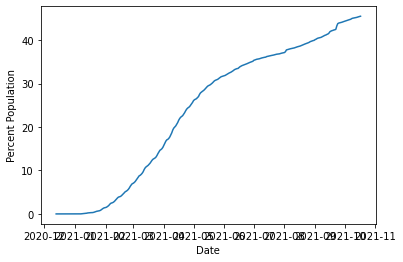

In [12]:
plt.xlabel('Date')
plt.ylabel('Percent Population')
plt.plot(series_comp_12)

We can see an increasing trend in the time series. By looking at the time series plot, we can already tell that it's not stationary. Let's check if the time series is stationary. Let's take the rolling mean and standard deviation and see if they are constant. If the rolling mean and stdev are constant then the series would be stationary. Before that let's plot the daily, weekly and monthly time series and notice the trends.

'Series_Complete_Pop_Pct'

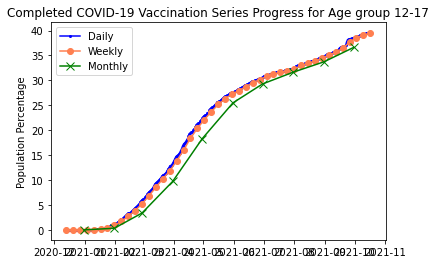

In [13]:
plot('Series_Complete_Pop_Pct', 'Completed COVID-19 Vaccination Series Progress for Age group 12-17')

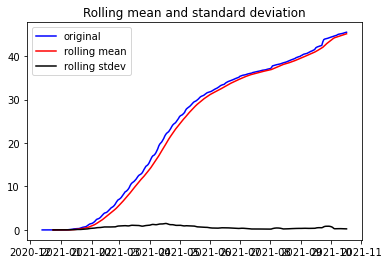

'Fully Vaccinated poulation percent 12+'

In [14]:
#checking the rolling mean and stdev
rolling(series_comp_12, 'Fully Vaccinated poulation percent 12+')


The standard deviation is somewhat constant but the mean isn't. It means that the series isn't stationary. For the series to be stationary, it should have its mean as well as standard deviation constant. Now let's check if we have any seasonality by decomposing the series.

'additive'

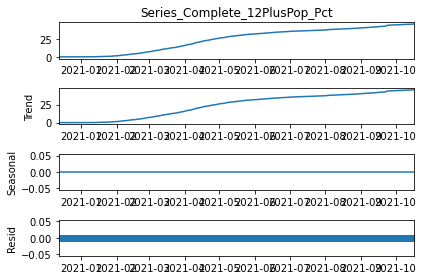

In [15]:
decompose(series_comp_12, "additive")

We Can see that there's no seasonality here and the residual plot is also constant. But we do see a trend in the time series. Similarly with the rolling average and stdev, we could see that the mean is changing but stdev remains the same. In order to make the time series stationary for modeling and forcasting, lets difference the series.

'Completely Vaccinated, 12+'

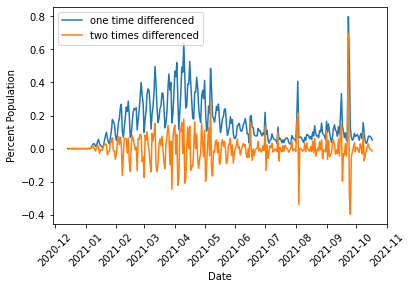

In [16]:
diff(series_comp_12, 'Completely Vaccinated, 12+')

When the series is differenced one time, it still has some trend in it and is not stationary. It becomes stationary when differenced two times. Let's check for the stationarity by checking the rolling mean and stdev and by implementing the Augmented Dickey Fuller test.

In [17]:
series_comp_12_diff = series_comp_12.diff().diff()

In [18]:
#got an error while running the Dickey test. When checked we had 2 null values in the diff2 series due to double differencing

series_comp_12_diff.fillna(0, inplace=True)
series_comp_12_diff.isnull().sum()

0

In [20]:
series_comp_12_diff.count()

309

In [21]:
adf(series_comp_12_diff, 'Fully Vaccinated, 12+')

Results of Augmented Dickey Fuller Test:
Test Statistic           -5.267448
p-value                   0.000006
no. of lags              14.000000
no. of obs used         294.000000
Critical value (1%)      -3.452790
Critical value (5%)      -2.871422
Critical value (10%)     -2.572035
dtype: float64


'Fully Vaccinated, 12+'

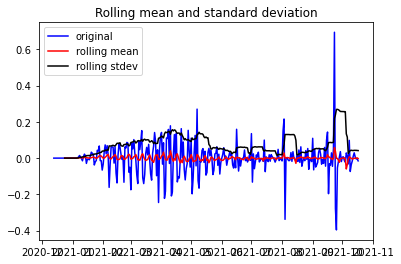

'Fully Vaccinated, 12+'

In [22]:
rolling(series_comp_12_diff, 'Fully Vaccinated, 12+')

From the ADF test and plotting the rolling average and stdev, we can see that our time series is now stationary. Now lets check the ACF and PACF plots.

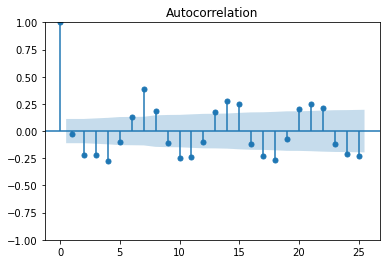

C:\Users\burq_\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


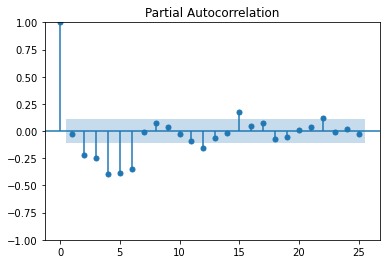

'Fully Vaccinated, 12+'

In [29]:
acf_pacf(series_comp_12_diff, 'Fully Vaccinated, 12+')

Usually, in the basic ARIMA model, we need to provide the p,d, and q values which are essential. We use statistical techniques to generate these values by performing the difference to eliminate the non-stationarity and plotting ACF and PACF graphs. In Auto ARIMA, the model itself will generate the optimal p, d, and q values which would be suitable for the data set to provide better forecasting.

In the Auto ARIMA model, note that small p,d,q values represent non-seasonal components, and capital P, D, Q represent seasonal components. It works similarly like hyper tuning techniques to find the optimal value of p, d, and q with different combinations and the final values would be determined with the lower AIC, BIC parameters taking into consideration.

Please note that this package was first named as “Pyramid” and later changed to “pmdarima”. Make sure you are installing the “pmdarima” package.

As our Time Series doesn't have a seasonal component, we'll use p,d,q values only.

Before ARIMA or Auto ARIMA models, we need to split our data into test and train. For time series, the split is a little different. We split the data in chronological order. we have a total of 309 rows/records. We'll split the data into train/test split of 70:30. 70% of the data is approx 217 rows out of the 309 rows.
train data - 217 rows
test data - 92 rows

In [69]:
train = series_comp_12[:217]
test = series_comp_12[-92:]

In [70]:
train.count()

217

In [71]:
test.count()

92

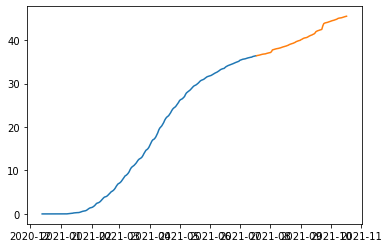

In [72]:
plt.plot(train)
plt.plot(test)

In [132]:
auto_arima_df(train, 0,2,0,20,5,20,100)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-489.559, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-488.055, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-488.177, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-491.557, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-486.316, Time=0.18 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.315 seconds


In [133]:
#fitting the ARIMA model
model = ARIMA(train, order = (0,2,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     Series_Complete_12PlusPop_Pct   No. Observations:                  217
Model:                            ARIMA(0, 2, 0)   Log Likelihood                 246.778
Date:                           Fri, 12 Nov 2021   AIC                           -491.557
Time:                                   17:19:34   BIC                           -488.186
Sample:                               12-13-2020   HQIC                          -490.195
                                    - 07-17-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0059      0.000     13.081      0.000       0.005       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                15.30
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               2.06   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

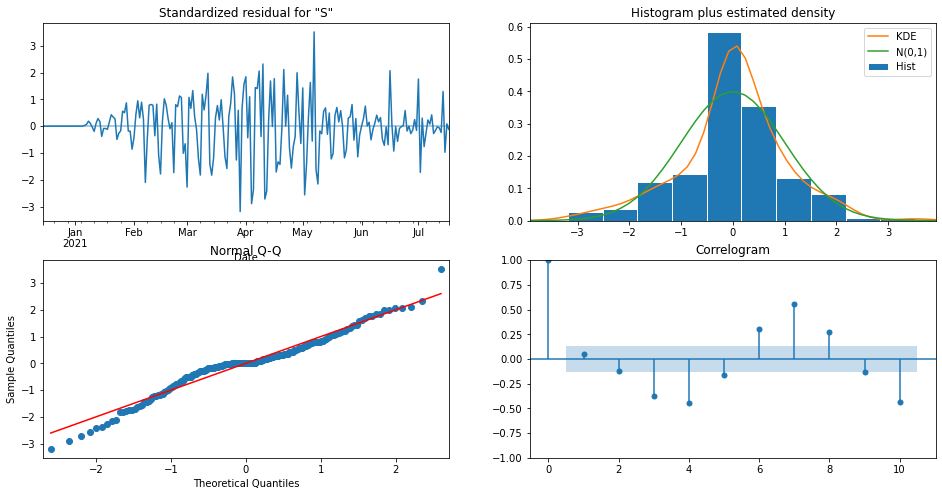

In [134]:
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

2021-07-19    36.483151
2021-07-20    36.536898
2021-07-21    36.590646
2021-07-22    36.644394
2021-07-23    36.698141
                ...    
2022-07-27    56.531048
2022-07-28    56.584796
2022-07-29    56.638544
2022-07-30    56.692291
2022-07-31    56.746039
Freq: D, Name: predicted_mean, Length: 378, dtype: float64

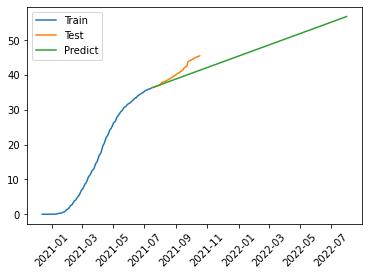

In [158]:
forecast(model_fit, train, test)

In [ ]:
# ALL MONTHLY DATA PLOTTED TOGETHER

start, end = '2020-12-13', '2021-10-17'
fig, ax = plt.subplots()
ax.plot(df_monthly.loc[start:end, 'Series_Complete_Pop_Pct'], label='Series_Complete_Pop_Pct', color='blue')
ax.plot(df_monthly.loc[start:end, 'Series_Complete_12PlusPop_Pct'], label='Series_Complete_12PlusPop_Pct', color='green')
ax.plot(df_monthly.loc[start:end, 'Series_Complete_18PlusPop_Pct'], label='Series_Complete_18PlusPop_Pct', color='yellow')
ax.plot(df_monthly.loc[start:end, 'Series_Complete_65PlusPop_Pct'], label='Series_Complete_65PlusPop_Pct', color='red')
ax.plot(df_monthly.loc[start:end, 'Completeness_pct'], label='Completeness_pct', color='magenta')
ax.plot(df_monthly.loc[start:end, 'Administered_Dose1_Pop_Pct'], label='Administered_Dose1_Pop_Pct', color='black')
ax.plot(df_monthly.loc[start:end, 'Administered_Dose1_Recip_12PlusPop_Pct'], label='Administered_Dose1_Recip_12PlusPop_Pct', color='cyan')
ax.plot(df_monthly.loc[start:end, 'Administered_Dose1_Recip_18PlusPop_Pct'], label='Administered_Dose1_Recip_18PlusPop_Pct', color='teal')
ax.plot(df_monthly.loc[start:end, 'Administered_Dose1_Recip_65PlusPop_Pct'], label='Administered_Dose1_Recip_65PlusPop_Pct', color='orange')
ax.set_ylabel("Population Percentage")
ax.set_xlabel("Monthly Data")
ax.set_title("COVID-19 Vaccination Series Completed Progress for All Age Groups")
ax.legend()

You can Input the different dataframes and columns in the functions to check results for rest of the age groups.